<a href="https://colab.research.google.com/github/jamesaje/Pytorch-Tutorial/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
# Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden layer h1 (number of neurons) -->
  # Hidden layer h2 (n) -->
  # output (3 classes of iris flowers)
  # fc1 - fully connected

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [25]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [28]:
my_df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [29]:
# Change last column from string to integer
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [30]:
# Train Test Split Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [31]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [34]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [35]:
# Convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
# Set the criteria of model to measure the error
# how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [37]:
# Train our model
# Epochs (one run thru all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, going to be high at first
  loss = criterion(y_pred, y_train)  # Predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.1095693111419678
Epoch: 20 and loss: 1.0961166620254517
Epoch: 30 and loss: 1.0845798254013062
Epoch: 40 and loss: 1.0739582777023315
Epoch: 50 and loss: 1.0637890100479126
Epoch: 60 and loss: 1.0539253950119019
Epoch: 70 and loss: 1.0440940856933594
Epoch: 80 and loss: 1.0337880849838257
Epoch: 90 and loss: 1.022811770439148


Text(0.5, 0, 'Epoch')

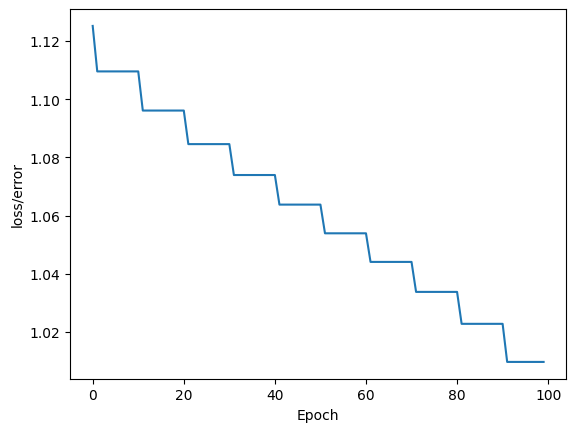

In [38]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")